<a href="https://colab.research.google.com/github/whsu00/project/blob/master/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager

In [6]:
log_file = pd.read_csv("valor_high_thresh_s0/progress.txt", sep= '\t')

In [11]:
log_file

,Epoch,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,EpLen,AverageVVals,StdVVals,MaxVVals,MinVVals,TotalEnvInteracts,LossPi,DeltaLossPi,LossV,DeltaLossV,LossDC,DeltaLossDC,Entropy,KL,Time,LogProbabilityContext,DecoderAccuracy,ContextDim
0,0,-11.239099,12.852259,17.241095,-38.051132,40.0,-0.009728,0.138808,0.400840,-0.427226,1600,-0.022386,-0.010006,98.987724,-46.671844,0.000000,0.000000,5.526782,-0.000081,2.110975,-1.531792,0.216148,5.0
1,1,-9.359007,11.776261,12.280624,-34.758854,40.0,-4.888005,2.334620,4.687226,-8.961204,3200,-0.100121,-0.006617,53.288353,-15.547104,4.167066,-2.635274,5.525006,0.001029,4.323311,-1.531792,0.216148,5.0
2,2,-10.174731,9.564177,9.486296,-29.672306,40.0,-4.215628,3.672013,9.790298,-10.558704,4800,-0.023836,-0.004000,29.889172,-6.035614,0.000000,0.000000,5.491004,0.000432,6.102762,-1.263242,0.282736,5.0
3,3,-12.367198,12.513931,11.088869,-40.200460,40.0,-4.446008,3.884085,9.437249,-11.566538,6400,0.074791,-0.003311,52.809868,-14.570179,1.674408,-0.411166,5.537622,0.000094,8.370145,-1.263242,0.282736,5.0
4,4,-13.274246,11.380252,13.782363,-36.122124,40.0,-6.127016,4.520429,13.454048,-14.207024,8000,0.050563,-0.003221,56.001793,-15.161102,0.000000,0.000000,5.516020,0.000758,10.217450,-0.861543,0.422510,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,29.539621,17.802550,63.493730,-14.018872,40.0,18.382738,6.589520,32.954750,-13.497885,1593600,-0.021350,-0.001730,163.053450,-39.650580,2.995289,-2.199791,4.894741,0.000748,1925.421851,-0.795498,0.451356,8.0
996,996,29.363379,17.617666,57.902897,-14.125839,40.0,17.256706,6.932307,31.913080,-14.926849,1595200,-0.098772,-0.001574,158.195790,-40.525154,0.000000,0.000000,4.884371,0.000525,1926.951877,-0.747114,0.473732,8.0
997,997,21.978771,16.311691,46.044490,-23.217825,40.0,16.583328,7.582169,32.581783,-12.999327,1596800,0.024967,-0.000112,133.141510,-45.019882,2.491955,-1.744841,4.882708,0.000151,1928.868341,-0.747114,0.473732,8.0
998,998,26.670040,20.293340,71.322640,-18.097770,40.0,14.823613,6.987291,30.435220,-14.699747,1598400,-0.004971,-0.000502,173.539690,-43.220140,0.000000,0.000000,4.876683,0.000039,1930.443110,-0.733472,0.480239,8.0


In [8]:
def get_file(file_path):
  log_file = pd.read_csv(file_path, sep= '\t')
  #Backfill blank values (Discriminator Only Updates Every 2 Epochs)
  log_file['LogProbabilityContext'] = log_file['LogProbabilityContext'].replace(to_replace = 0, method='bfill')
  log_file['DecoderAccuracy'] = log_file['DecoderAccuracy'].replace(to_replace = 0, method='bfill')
  log_file['LossDC'] = log_file['LossDC'].replace(to_replace = 0, method='bfill')
  log_file['DeltaLossDC'] = log_file['DeltaLossDC'].replace(to_replace = 0, method='bfill')
  return log_file

In [25]:
def create_line_graph(df, plotCol, x_label, y_label, title, legendTxt):
  fig = plt.figure(figsize=(20,8))
  sns.lineplot(df['Epoch'], df[plotCol], label = legendTxt)
  axis_font = {'fontname':'Times', 'size':'15'}
  title_font = {'fontname':'Times', 'size':'20'}
  plt.xlabel(x_label, **axis_font)
  plt.ylabel(y_label, **axis_font)
  plt.legend(prop={'size': 16})
  plt.title(title, **title_font)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


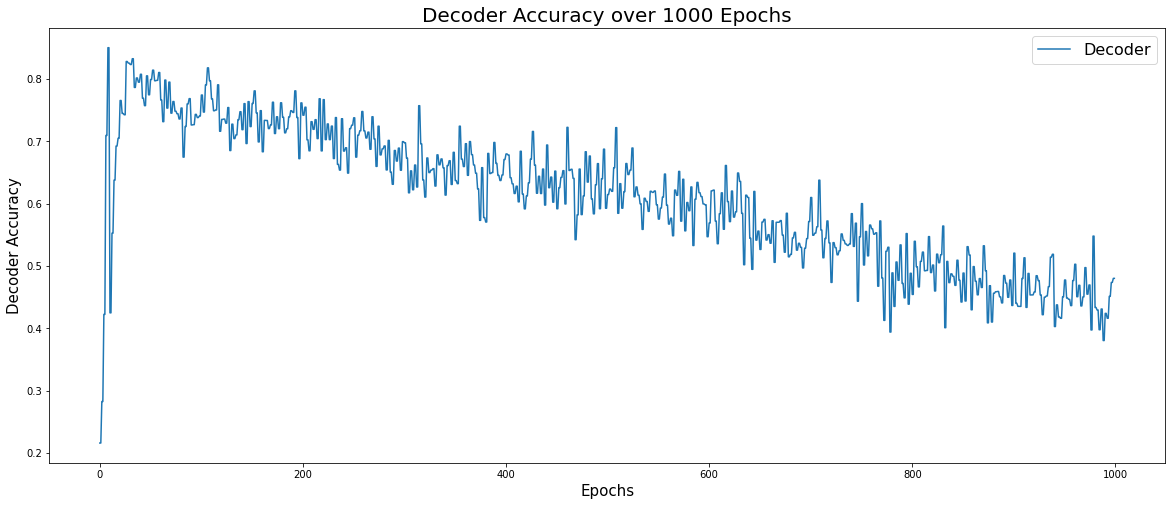

In [26]:
log_file = get_file('/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt')
create_line_graph(df = log_file, plotCol= 'DecoderAccuracy', x_label= 'Epochs', y_label = 'Decoder Accuracy', title = 'Decoder Accuracy over 1000 Epochs', legendTxt='Decoder')